In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
#Cleaning Data#
df= pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.set_index('Person ID', inplace = True)
replace_dict = {'Normal Weight': 'Normal'}
df['BMI Category'] = df['BMI Category'].replace(replace_dict)
df=df.fillna('Not sick')
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Not sick
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Not sick
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Not sick
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
Person ID,,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Not sick,126,83
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Not sick,125,80
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Not sick,125,80
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [4]:
x=df['Sleep Duration']
y=df['Stress Level']

In [5]:
correlation = df['Sleep Duration'].corr(df['Stress Level'])
correlation

np.float64(-0.8110230278940451)

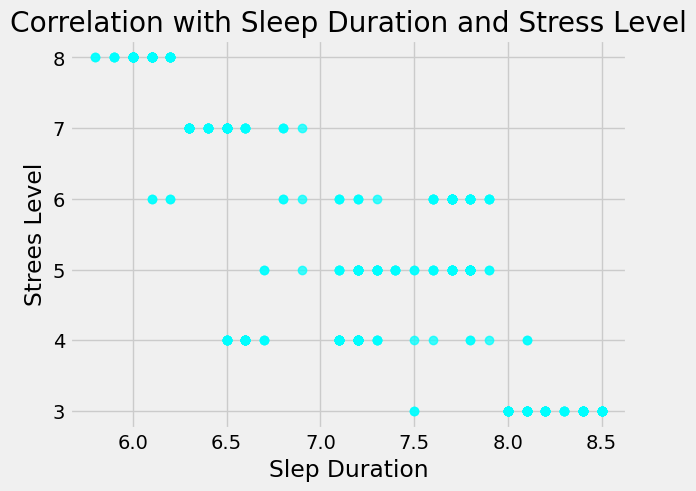

In [15]:

plt.scatter(x, y, color= 'cyan' ,linewidth=1 , alpha= 0.75)
plt.title('Correlation with Sleep Duration and Stress Level')
plt.xlabel('Slep Duration')
plt.ylabel('Strees Level')
plt.grid(True)
plt.style.use('fivethirtyeight')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Teacher'),
  Text(4, 0, 'Nurse'),
  Text(5, 0, 'Engineer'),
  Text(6, 0, 'Accountant'),
  Text(7, 0, 'Scientist'),
  Text(8, 0, 'Lawyer'),
  Text(9, 0, 'Salesperson'),
  Text(10, 0, 'Manager')])

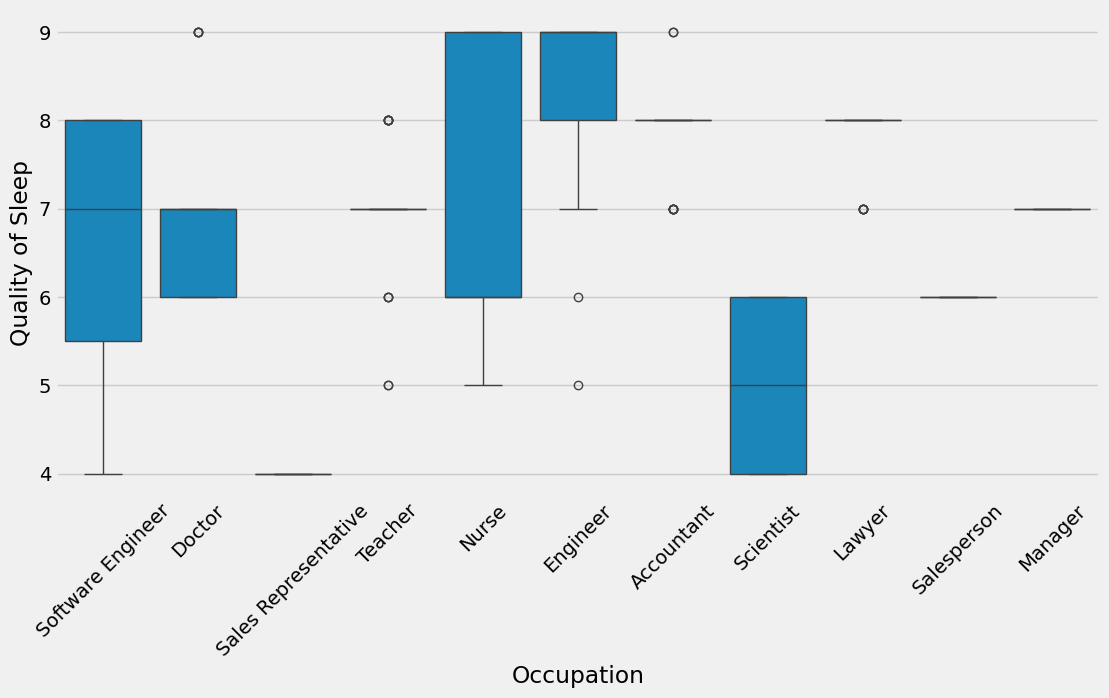

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df , x= 'Occupation' , y='Quality of Sleep')
plt.xticks(rotation=45)

In [8]:
numeric_df = df.select_dtypes(include=['number']).drop(columns=['Person ID'], errors='ignore')
corr_matrix = numeric_df.corr()

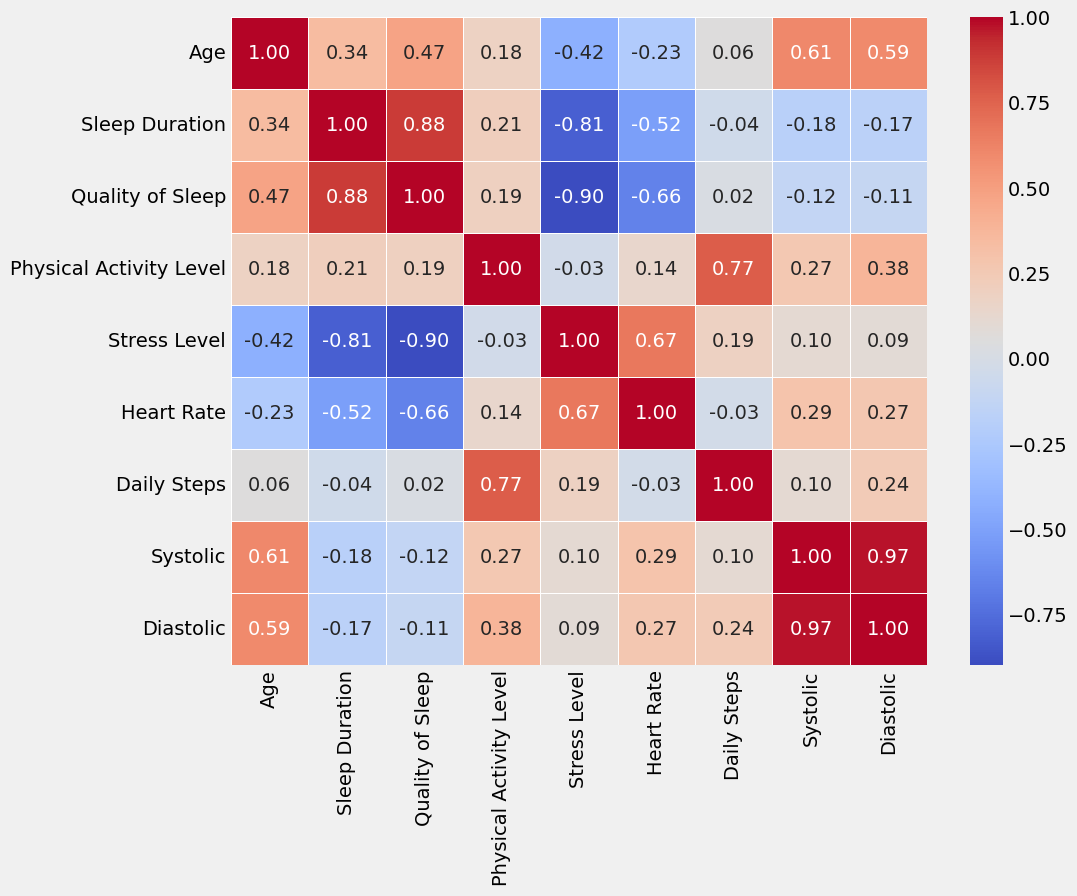

In [9]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [10]:
df.groupby('Gender')[['Quality of Sleep', 'Stress Level']].mean()

,Quality of Sleep,Stress Level
Gender,,
Female,7.664865,4.675676
Male,6.968254,6.079365


In [11]:
BMI_Category = df['BMI Category']
Sleep_Disorder = df['Sleep Disorder']

In [12]:
crosstab=pd.crosstab(BMI_Category , Sleep_Disorder)
crosstab

Sleep Disorder,Insomnia,Not sick,Sleep Apnea
BMI Category,,,
Normal,9,200,7
Obese,4,0,6
Overweight,64,19,65


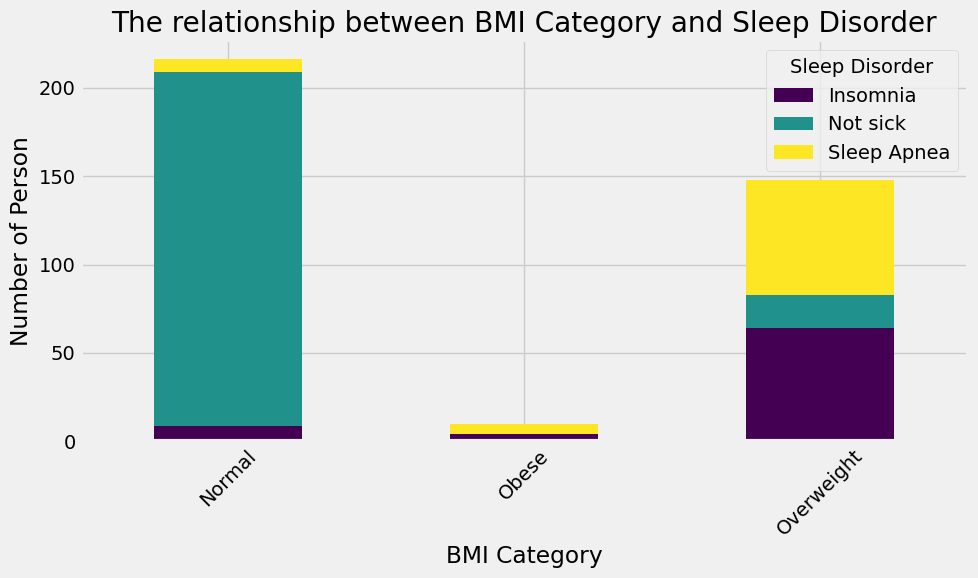

In [14]:
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('The relationship between BMI Category and Sleep Disorder')
plt.xlabel('BMI Category')
plt.ylabel('Number of Person')
plt.xticks(rotation=45)
plt.legend(title='Sleep Disorder')
plt.grid(True)
plt.style.use('fivethirtyeight')
plt.tight_layout()

In [ ]:
print(plt.style.available)